# EDA-Calidad del dataset Air_Quality

## Librerías

In [145]:
import os
import warnings

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ajustes

Se ignoran los warnings.

In [147]:
warnings.filterwarnings("ignore")

Se hacen unas modificaciones en la configuracion para que los resultados salgan completos.

In [148]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

## Importación del dataset

Ruta actual de este EDA-Calidad.

In [149]:
ruta_actual = os.getcwd()

ruta_actual

'c:\\Users\\franc\\Desktop\\taxi_electrico_nyc\\EDA'

Ruta raiz del proyecto.

In [150]:
ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_proyecto

'c:\\Users\\franc\\Desktop\\taxi_electrico_nyc'

Ruta del dataset 'Air_Quality'.

In [151]:
ruta_del_dataset = os.path.join(
    ruta_del_proyecto, 
    'assets', 
    'Datasets', 
    'Air_Quality_20241206.csv'
    )

ruta_del_dataset

'c:\\Users\\franc\\Desktop\\taxi_electrico_nyc\\assets\\Datasets\\Air_Quality_20241206.csv'

Se importa en dataset.

In [152]:
air_quality = pd.read_csv(
    ruta_del_dataset
    )

## Exploración General

Primeras cinco filas.

In [153]:
air_quality.head(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


Ultimas cinco filas.

In [154]:
air_quality.tail(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN
18024,151658,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,408.0,Jamaica,2005,01/01/2005,41.0,NaN


Tamaño.

In [155]:
print("Cantidad de filas: ")
print(air_quality.shape[0])
print()
print("Cantidad de columnas:")
print(air_quality.shape[1])

Cantidad de filas: 
18025

Cantidad de columnas:
12


## Tipos de datos

Se obtiene el nombre de cada columna y su tipo de dato.

In [156]:
air_quality.dtypes

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID       float64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object

## Valores Faltantes

Se seleccionan las columnas de tipo object.

In [157]:
columnas_object = air_quality.select_dtypes(include='object').columns

columnas_object

Index(['Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Place Name',
       'Time Period', 'Start_Date'],
      dtype='object')

Se comprueba si tienen cadenas vacias.

In [158]:
filas_con_valores_vacios = air_quality[
    columnas_object].apply(lambda x: x == "").any(axis=1)

print('Cantidad de valores faltantes:')
print(filas_con_valores_vacios.sum())

Cantidad de valores faltantes:
0


## Valores Nulos

In [159]:
air_quality.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

Dos columnas tienen 9 valores nulos. La última columna, llamada Message, tiene todos sus valores nulos.

## Valores Duplicados

In [160]:
print(air_quality.duplicated().sum())

0


No hay ninguna fila duplicada.

Ayuda Memoria.

In [161]:
air_quality.dtypes

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID       float64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object

In [162]:
print(air_quality['Unique ID'].duplicated().sum())

0


No hay ningun valor repetido en la columna id llamada Unique ID.

## Diccionario de Datos

In [163]:
ruta_del_diccionario = os.path.join(
    ruta_del_proyecto, 
    'assets', 
    'Data_dictionary', 
    'Data-Dictionary-Air_Quality_2024.xlsx'
    )

ruta_del_diccionario

'c:\\Users\\franc\\Desktop\\taxi_electrico_nyc\\assets\\Data_dictionary\\Data-Dictionary-Air_Quality_2024.xlsx'

In [164]:
diccionario = pd.read_excel(
    ruta_del_diccionario, 
    sheet_name='Column Information', 
    header=1
    )

In [165]:
diccionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Column Name              13 non-null     object 
 1   Column Description       13 non-null     object 
 2   Expected/Allowed Values  2 non-null      object 
 3   Field Limitations        10 non-null     object 
 4   Additional Notes         0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 652.0+ bytes


Se va a eliminar la última columna llamada Additional Notes porque solo tiene nulos y se necesita optimizar la visualizacion.

In [166]:
diccionario.drop(columns='Additional Notes', inplace=True)

In [167]:
diccionario

,Column Name,Column Description,Expected/Allowed Values,Field Limitations
0,Name of the column exactly as it appears in the dataset.,"A brief, plain-language explanation of what the data in the column means.","Specifies if there is an expected range and/or format of possible values. For example, if the data type is Date & Time, this field will note whether the timestamp is MM/DD/YYYY or MM/YYYY. If the Column Name is ice cream, this field might note that values can be Chocolate, Vanilla or Strawberry.\n\nIf relevant, this field specifies the unit of measurement of the data field, e.g. thousands, millions, $ value, miles, feet, year, etc.","Describes any unique characteristics or potential analytical limitations presented by this field, including: \n- the reasoning for any null, zero, or empty values in the data\n- if the data in the column was integrated from another dataset or organization\n- if the data covered includes a different time period\n- the source of the column and how the data in the column was generated. \n\nFor example, information on how the data in this column was generated can include whether the data was self-reported directly by a person, system generated by a database or agency system, derived through analytical manipulation of other fields or records; or obtained from a different agency."
1,unique_id,Unique record identifier,NaN,NaN
2,indicator_id,Identifier of the type of measured value across time and space,NaN,"Indicators have the same data source, but may be broken into different measures"
3,name,Name of the indicator,NaN,"Indicators have the same data source, but may be broken into different measures"
4,measure,How the indicator is measured,NaN,This could indicate that data values are rates or counts or percentages - as well as if the measure is a stratification of the indicator data.
5,measure_info,Information (such as units) about the measure,NaN,NaN
6,geo_type_name,Geography type,UHF' stands for United Hospital Fund neighborhoods,"For instance, Citywide, Borough, and Community Districts are different geography types"
7,geo_join_id,"Identifier of the neighborhood geographic area, used for joining to mapping geography files to make thematic maps",NaN,Reference the geo_type_name to know which geography files to join with
8,geo_place_name,Neighborhood name,NaN,Could be 'Brownsville' or 'Brooklyn' or other designation depending on Geography type
9,time_period,Description of the time that the data applies to,NaN,"Could be a year, range of years, or season for example"


## Outliers y Distribución

### Columna Numérica 'Data Value'

Ayuda Memoria

In [168]:
air_quality.dtypes

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID       float64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object

Se obtiene la cantidad de valores por cada Data Value.

In [169]:
air_quality['Data Value'].value_counts().head()

Data Value
8.3     144
8.0     140
10.0    136
8.4     134
6.7     133
Name: count, dtype: int64

Se obtienen los cuartiles y la mediana.

In [170]:
Q1 = air_quality['Data Value'].quantile(0.25)
print('Primer cuartil:')
print(Q1)

print()

mediana = air_quality['Data Value'].median()
print('Mediana')
print(mediana)

print()

Q3 = air_quality['Data Value'].quantile(0.75)
print('Tercer cuartil:')
print(Q3)

Primer cuartil:
8.9

Mediana
15.2

Tercer cuartil:
26.7


Se obtiene el rango intercuartilico.

In [171]:
IQR = Q3 - Q1
print('IQR:')
print(IQR)

IQR:
17.799999999999997


Se obtienen los limites.

In [172]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Limite Inferior')
print(lower_bound)

print()

print('Limite Superior')
print(upper_bound)

Limite Inferior
-17.799999999999997

Limite Superior
53.39999999999999


#### Gráfico Histograma

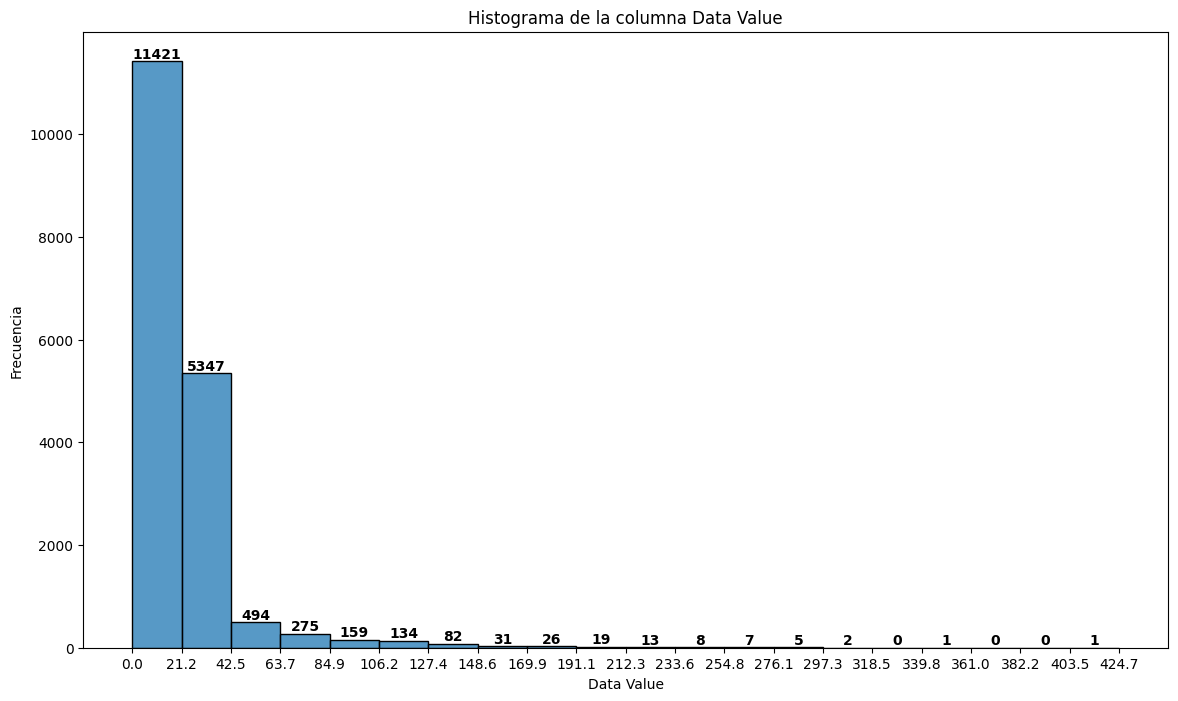

In [173]:
plt.figure(figsize=(14, 8))
hist = sns.histplot(x=air_quality['Data Value'], bins=20)
plt.title('Histograma de la columna Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frecuencia')

for patch in hist.patches:
    freq = int(patch.get_height())
    
    x = patch.get_x() + patch.get_width() / 2
    y = freq
    
    hist.annotate(f'{freq}', (x, y), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black', rotation=0)

bin_width = hist.patches[0].get_width()
bin_edges = np.arange(0, bin_width * len(hist.patches) + 1, bin_width)
plt.xticks(bin_edges)

plt.show()

La mayoria de los Data Value tienen un valor menor a 50. De esos numeros, la frecuencia es mucho mayor entre los intervalos 0 a 21. En segundo lugar viene el intervalo 21 a 42. Luego se reduce drasticamente.

#### Gráfico Boxplot

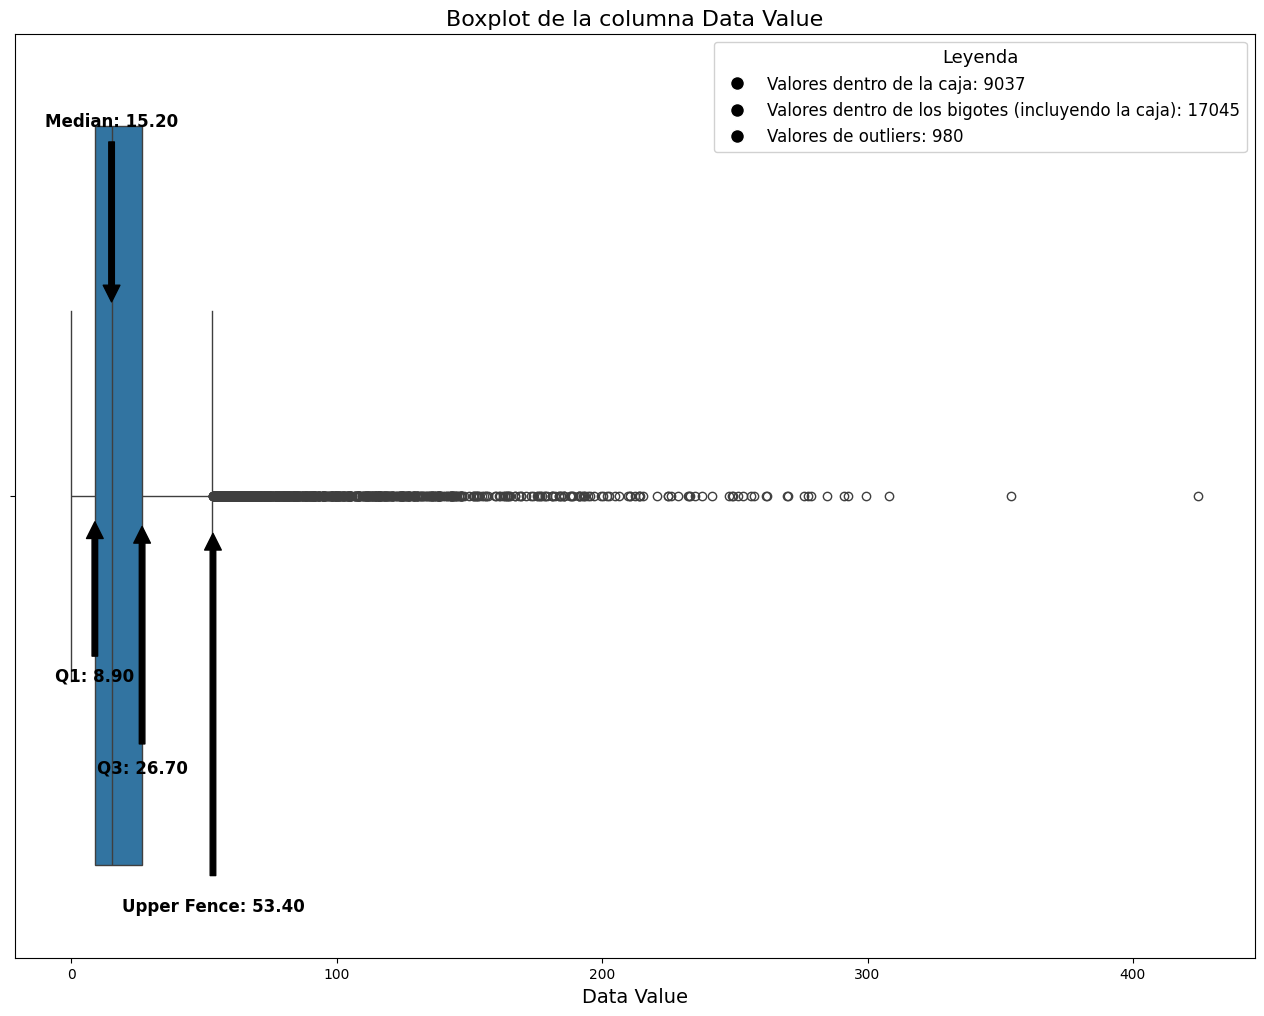

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
boxplot = sns.boxplot(x=air_quality['Data Value'])
plt.title('Boxplot de la columna Data Value', fontsize=16)
plt.xlabel('Data Value', fontsize=14)

stats = air_quality['Data Value'].describe(percentiles=[.25, .5, .75])
q1 = stats['25%']
median = stats['50%']
q3 = stats['75%']
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

outliers = air_quality[(air_quality['Data Value'] < lower_fence) | (air_quality['Data Value'] > upper_fence)].shape[0]

within_box = air_quality[(air_quality['Data Value'] >= q1) & (air_quality['Data Value'] <= q3)].shape[0]
within_whiskers = air_quality[(air_quality['Data Value'] >= lower_fence) & (air_quality['Data Value'] <= upper_fence)].shape[0]

plt.annotate(f'Median: {median:.2f}', xy=(median, -0.2), xytext=(median, -0.4), ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, fontweight='bold')
plt.annotate(f'Q1: {q1:.2f}', xy=(q1, 0.02), xytext=(q1, 0.2), ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, fontweight='bold')
plt.annotate(f'Q3: {q3:.2f}', xy=(q3, 0.02), xytext=(q3, 0.3), ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, fontweight='bold')
plt.annotate(f'Upper Fence: {upper_fence:.2f}', xy=(upper_fence, 0.02), xytext=(upper_fence, 0.45), ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, fontweight='bold')

legend_labels = [
    f'Valores dentro de la caja: {within_box}',
    f'Valores dentro de los bigotes (incluyendo la caja): {within_whiskers}',
    f'Valores de outliers: {outliers}'
]

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='w', marker='o', markerfacecolor='black', markersize=10, label=f'Valores dentro de la caja: {within_box}'),
                   Line2D([0], [0], color='w', marker='o', markerfacecolor='black', markersize=10, label=f'Valores dentro de los bigotes (incluyendo la caja): {within_whiskers}'),
                   Line2D([0], [0], color='w', marker='o', markerfacecolor='black', markersize=10, label=f'Valores de outliers: {outliers}')]

plt.legend(handles=legend_elements, fontsize=12, loc='upper right', frameon=True, framealpha=0.9, facecolor='white', title='Leyenda', title_fontsize='13')

plt.show()


### Columnas Categóricas

In [175]:
columnas_categoricas = air_quality.select_dtypes(object).columns
print("Columnas Categóricas:", columnas_categoricas)

Columnas Categóricas: Index(['Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Place Name',
       'Time Period', 'Start_Date'],
      dtype='object')


In [176]:
columnas_a_eliminar = ['Geo Place Name', 'Time Period', 'Start_Date']

columnas_categoricas = [
    col for col in columnas_categoricas 
    if col not in columnas_a_eliminar
    ]

columnas_categoricas

['Name', 'Measure', 'Measure Info', 'Geo Type Name']

#### Barplot de las Columnas Categóricas

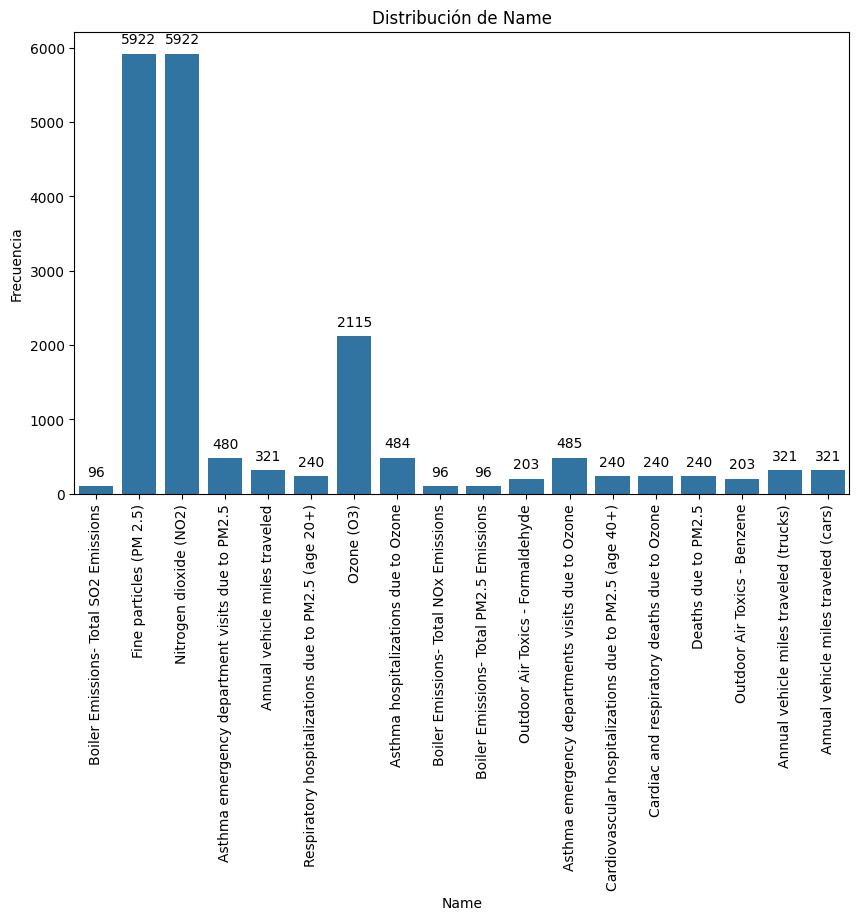

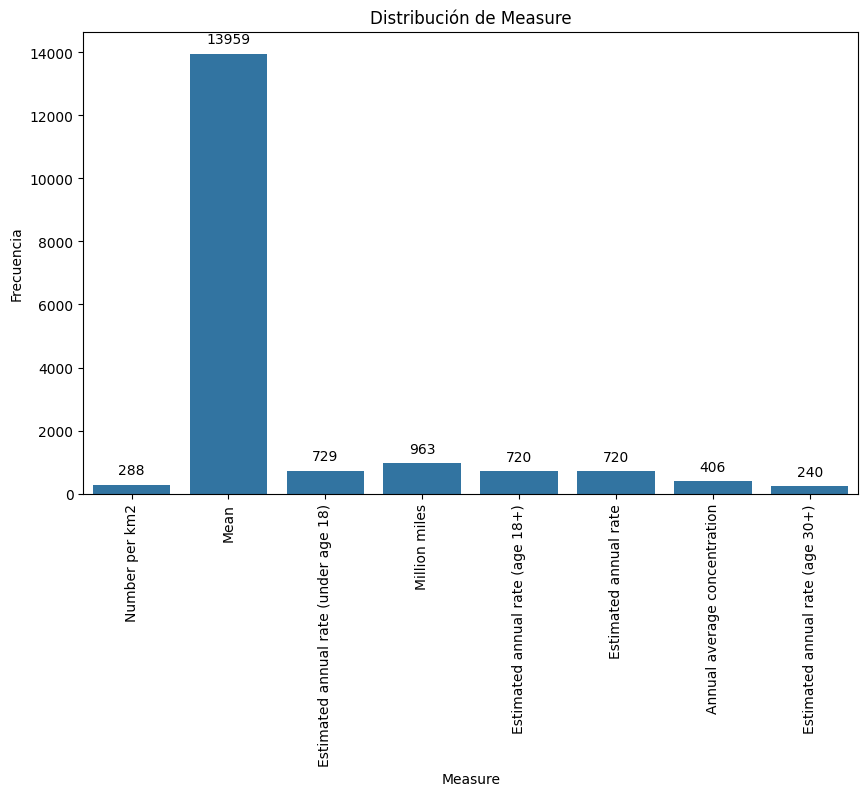

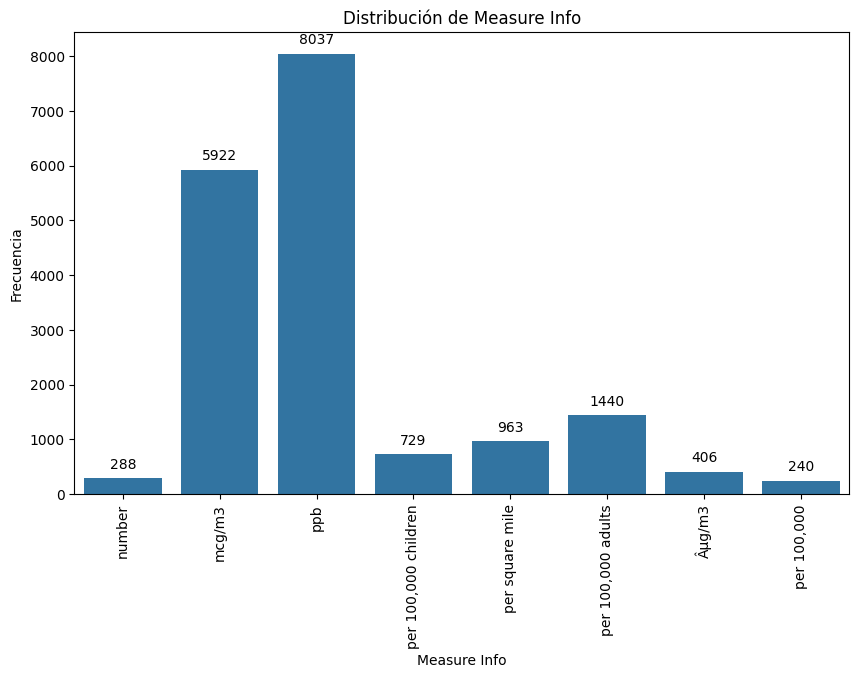

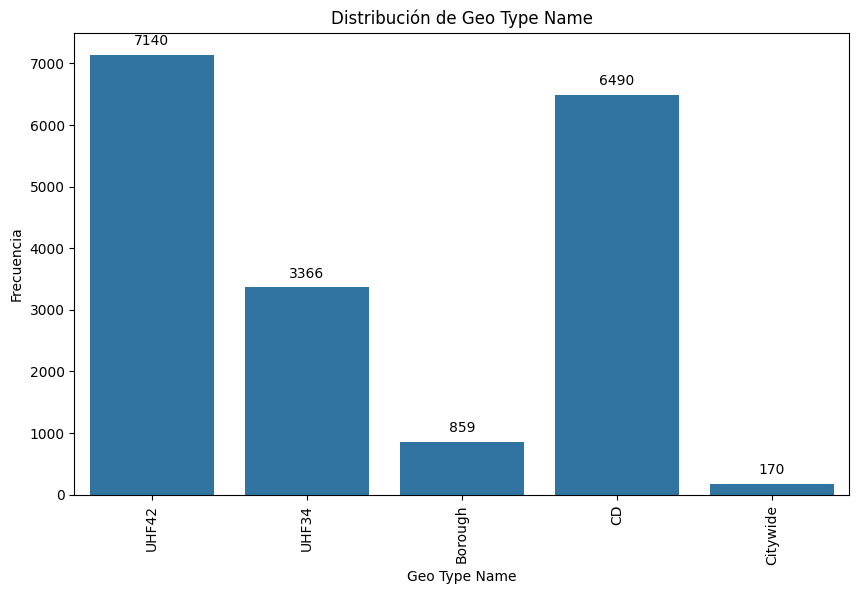

In [177]:
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    bar_plot = sns.countplot(x=columna, data=air_quality)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
    
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 10), 
                          textcoords = 'offset points')
    
    plt.show()

Estos ultimos graficos se crearon para dejar constancia de las categorias y sus respectivas cantidades. El objetivo es usarlas en el ETL.